# DMG2 Assignment Problem 2

_Purity, Entropy, Information Gain_

In [38]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [2]:
DATA_DIR = '/home/jishnu/Documents/ISB/Term3/dmg2/assignments/hw_assignment1/dmg2/datasets/mushroom'
train = pd.read_csv(os.path.join(DATA_DIR,'train.csv'),usecols=['V{0}'.format(i) for i in range(1,24)])
test = pd.read_csv(os.path.join(DATA_DIR,'test.csv'),usecols=['V{0}'.format(i) for i in range(1,24)])

train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23'],
      dtype='object')

In [3]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,s,m


In [4]:
#for col_no in range(1,24):
    #print('V{0}'.format(col_no))
#    train['V{0}'.format(col_no)] = 
train_cat = train.astype('category')
train_cat.dtypes

V1     category
V2     category
V3     category
V4     category
V5     category
V6     category
V7     category
V8     category
V9     category
V10    category
V11    category
V12    category
V13    category
V14    category
V15    category
V16    category
V17    category
V18    category
V19    category
V20    category
V21    category
V22    category
V23    category
dtype: object

In [5]:
train_cat.describe().T

,count,unique,top,freq
V1,4907,2,e,2535
V2,4907,6,x,2198
V3,4907,4,y,1998
V4,4907,10,n,1372
V5,4907,2,f,2862
V6,4907,9,n,2148
V7,4907,2,f,4772
V8,4907,2,c,4135
V9,4907,2,b,3419
V10,4907,12,b,1040


In [6]:
pd.DataFrame(train_cat['V1'].value_counts()).reset_index()

,index,V1
0,e,2535
1,p,2372


In [9]:
2535/4907

0.5166089260240473

In [32]:
(2535/4907)**2 + (2372/4907)**2

0.5005517128473446

In [10]:
((2535/4907)*np.log(4907/2535)) + ((2372/4907)*np.log(4907/2372))

0.69259536620543649

In [13]:
np.sum(pd.DataFrame(train_cat['V1'].value_counts()).reset_index()['V1'])

4907

In [29]:
purity_table = pd.DataFrame(columns=['feature','accuracy','gini_index','1-entropy'])
for col_no in range(1,24):
    feature = 'V{0}'.format(col_no)
    freq_tab = pd.DataFrame(train_cat[feature].value_counts()).reset_index()
    max_freq = np.max(freq_tab[feature])
    sum_freq = np.sum(freq_tab[feature])
    accuracy = np.round(max_freq / sum_freq, 4)
    gini_index,entropy = 0,0
    for index,rows in freq_tab.iterrows():
        gini_index = gini_index + (rows[feature]/sum_freq)**2
        entropy = entropy + (rows[feature]/sum_freq) * np.log(sum_freq/rows[feature])
    purity_table = purity_table.append({'feature' : feature, 'accuracy' : accuracy, 'gini_index' : np.round(gini_index,4), '1-entropy' : np.round(1-entropy,4)},ignore_index=True)
    

In [30]:
purity_table

,feature,accuracy,gini_index,1-entropy
0,V1,0.5166,0.5006,0.3074
1,V2,0.4479,0.3676,-0.1441
2,V3,0.4072,0.3413,-0.0897
3,V4,0.2796,0.1996,-0.7348
4,V5,0.5832,0.5139,0.3208
5,V6,0.4377,0.2793,-0.5971
6,V7,0.9725,0.9465,0.8740
7,V8,0.8427,0.7349,0.5648
8,V9,0.6968,0.5774,0.3864
9,V10,0.2119,0.1407,-1.0998


## Plotting Accuracy vs 1-Entropy

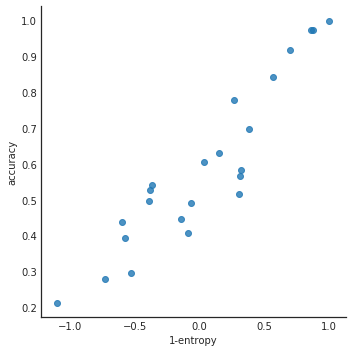

In [39]:
sns.lmplot(x='1-entropy',y='accuracy',data=purity_table,fit_reg=False)
plt.show();

It is observed that as the entropy decreases, the accuracy increases as the purity increases.

## Google Form Answers

* Feature with highest accuracy : V17
* Accuracy of feature with highest accuracy : 1
* Feature with lowest entropy : V17
* Lowest Entropy : 0
* Feature with highest Gini Index : V17
* Highest Gini Index across all features : 1